# Model Fitness: estrategia de retención de clientes

# Contenido

1. [Descripción del análisis](#Descripción-del-análisis)


2. [Análisis exploratorio de datos (EDA)](#Análisis-exploratorio-de-datos-(EDA))


3. [Paso 1: Modelo para predecir la cancelación de usuarios y usuarias](#Paso-1:-Modelo-para-predecir-la-cancelación-de-usuarios-y-usuarias)
    

4. [Paso 2: Clústeres de usuarios y usuarias](#Paso-2:-Clústeres-de-usuarios-y-usuarias)


5. [Conclusión](#Conclusión)

## Descripción del análisis
<a id="Descripción del análisis"></a>

El análisis a la cadena de gimnasios Model Fitness se realiza con la finalidad de combatir la cancelación de los clientes, para conseguir este objetivo se analizará los datos y se realizará una estrategia de retención de clientes.

El paso uno de este análisis es construir un modelo para predecir la cancelación de usuarios, donde se entrenará el modelo en el set de entrenamiento con dos métodos: regresión logística y bosque aleatorio. Para así poder evaluar la exactitud, precisión y recall para ambos modelos y realizar una comparativa de ambos modelos para elegir la mejor opción. 

El paso dos del análisis es creación de clústeres de usuarios/as, donde se creará una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. También se entrenará un modelo de clustering con el algoritmo K-means y se predecirá los clústeres de clientes.  

## Análisis exploratorio de datos (EDA)
<a id="Análisis exploratorio de datos (EDA)"></a>

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Mostramos las primeras 5 filas 
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# Total de filas y columnas
print('Cantidad de filas y columnas:', data.shape)

Cantidad de filas y columnas: (4000, 14)


In [4]:
# Columnas
print('Nombre de las columnas:', data.columns)

Nombre de las columnas: Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


In [5]:
# Mostarmos la información general 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Se muestra en total de 14 columnas y 4000 filas, podemos encontrar información de los clientes como cancelación, genero, ubicación cercana, compañía asociada, si se usó una oferta, si proporciono número de teléfono, edad, tiempo de vida y más.

**Descripción estadistica de los datos numéricos**

In [6]:
# Mostramos información estadistica del dataset
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
# Buscamos valores ausentes
print(data.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


El dataset no tiene valores ausentes, con la información estadística podemos ver que la edad de los clientes es de 18 a 41 años y que el tiempo máximo de un cliente en el gimnasio es de 31 meses y que la media de cancelación es de 0.26.

**Características de las personas que cancelaron y las que se quedaron**

In [8]:
# Valores medios en cada grupo de las personas que cancelaron y las que no 
group_means = data.groupby('Churn').mean()
group_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


En promedio tanto las personas que cancelaron como las que se quedaron en genero se obtiene 0.51, para el tiempo de vida los valores promedio son muy diferentes mientras que en 0 la media es de 4.71 para 1 el promedio es de 0.99.

**Histogramas y matriz de correlación**

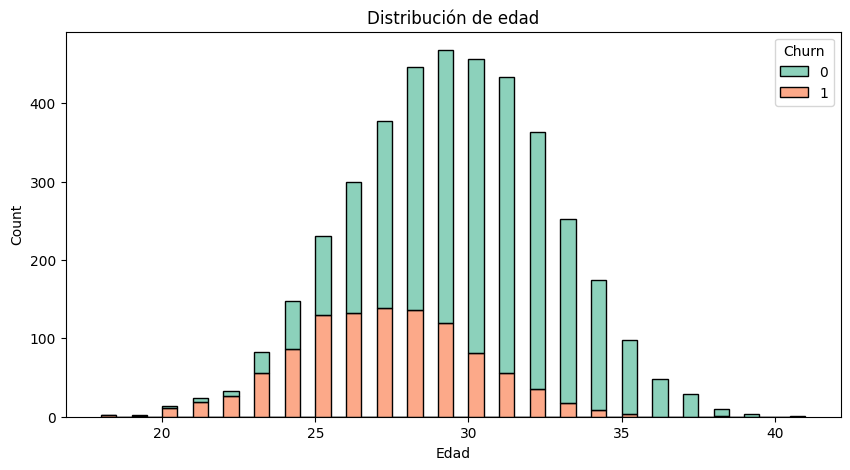

In [9]:
# Histograma de la edad
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Churn', multiple="stack", palette='Set2')
plt.xlabel('Edad')
plt.title(f'Distribución de edad')
plt.show()

Como se puede observar en el grafico la edad de los clientes que se quedaron esta entre los 25 y los 29 años, mientras que los clientes que cancelaron están entre la edad de 27 a 32 años.

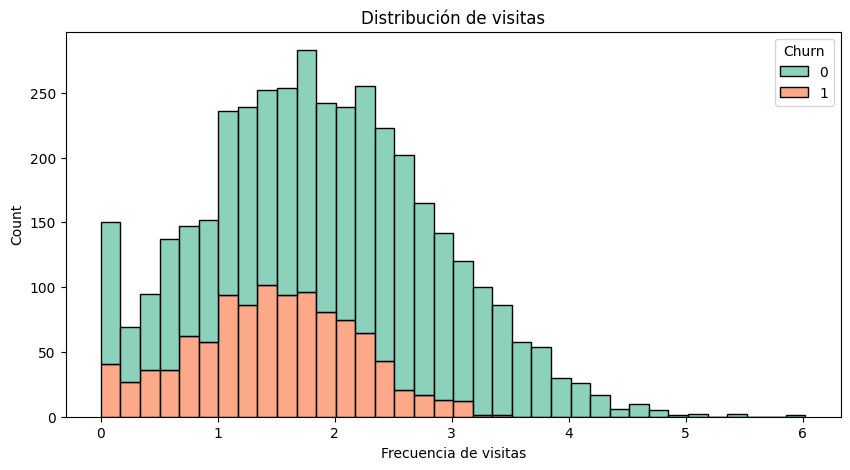

In [10]:
# Histograma de las visitas 
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Avg_class_frequency_total', hue='Churn', multiple="stack", palette='Set2')
plt.xlabel('Frecuencia de visitas')
plt.title(f'Distribución de visitas')
plt.show()

La mayoría de los clientes tiene un promedio de visitas totales de 1 a 2 visitas, para los clientes que cancelaron el promedio de visitas totales es 2 y en gran medida se puede observar que aproximadamente 150 clientes que cancelaron no realizaron ninguna visita al gimnasio.

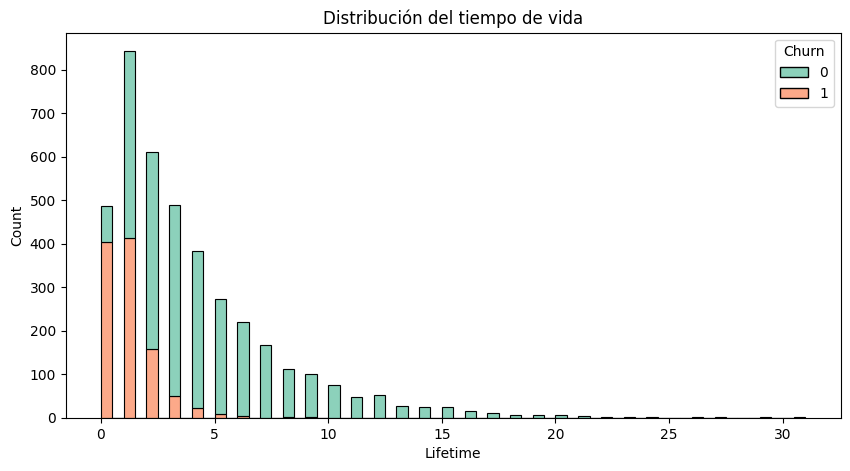

In [11]:
# Histograma del tiempo de vida
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Lifetime', hue='Churn', multiple="stack", palette='Set2')
plt.title(f'Distribución del tiempo de vida')
plt.show()

Para el tiempo de vida de los clientes que se quedaron se puede observar que la mayoría se agrupa de 0 a 5 meses, también podemos decir que el tiempo de vida popular es de 1 mes, para los clientes que cancelaron el tiempo de vida es de 0 a 5 meses siendo 1 mes el popular. También podemos decir que para estos clientes el tiempo de vida puede llegar hasta los 30 meses pero son muy pocos los clientes.

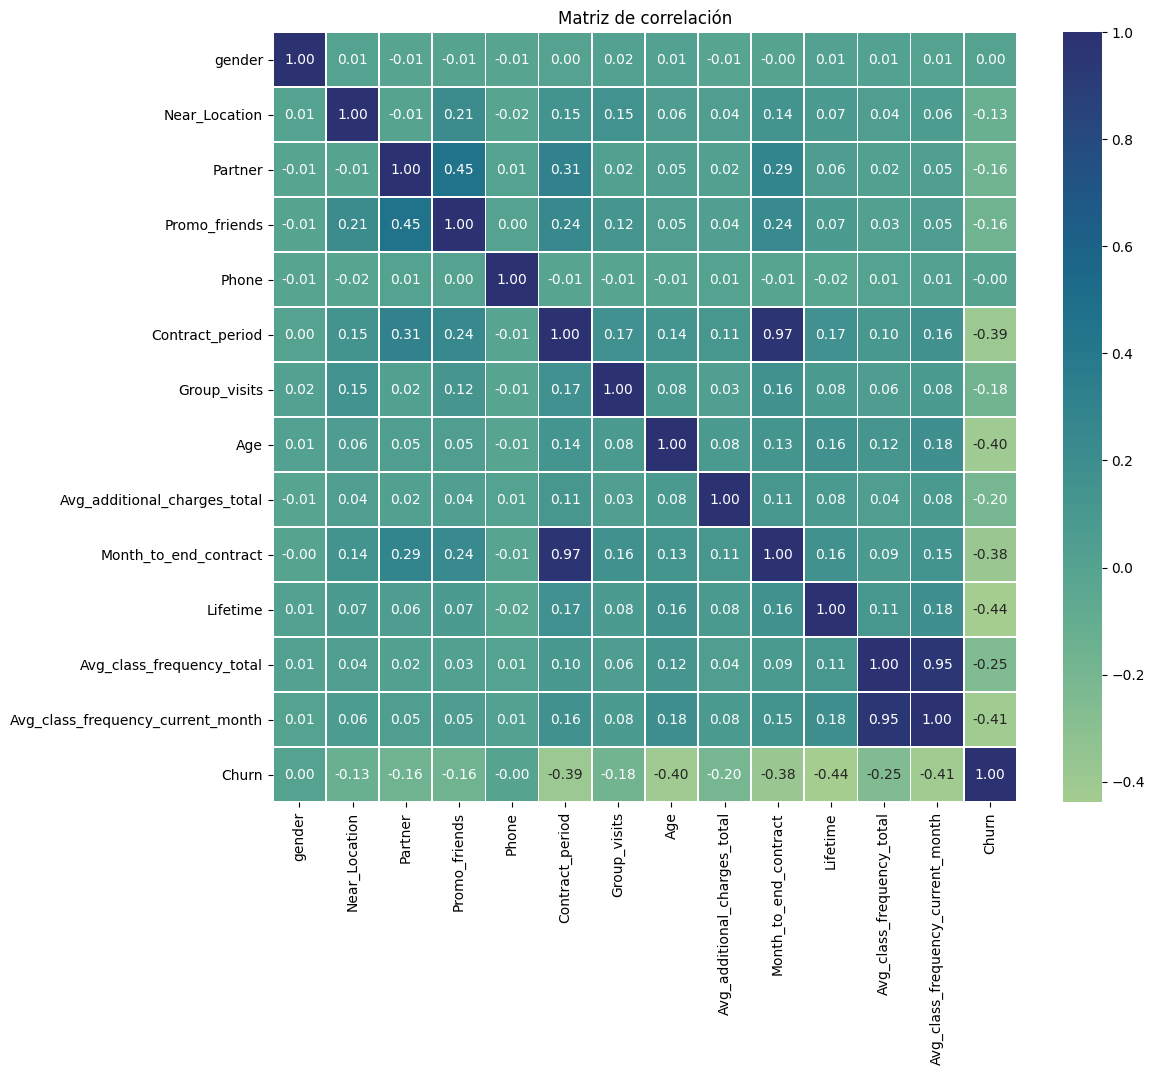

In [12]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="crest", linewidth=.5)
plt.title("Matriz de correlación")
plt.show()

Los factores más relacionados con la cancelacion son la edad, la frecuencia de clases promedio del mes actual, la frecuencia de clases promedio total, el tiempo de vida del cliente y  la duración del contrato. Los factores menos relacionados son género, uso de promoción de amigos y teléfono.

## Paso 1: Modelo para predecir la cancelación de usuarios y usuarias
<a id="Paso 1: Modelo para predecir la cancelación de usuarios y usuarias"></a>

**Regresión lógistica**

In [13]:
# División de los datos en características (la matriz X) y una variable objetivo (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Algoritmo del modelo
model = LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

# Previsiones
probabilities = model.predict_proba(X_test)[:,1]

# Predicción binaria
predictions = model.predict(X_test)

# Métricas estudiadas para la predicción resultante
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Exactitud: 0.92
Precisión: 0.87
Recall: 0.81


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como podemos observar las métricas del modelo de regresión logística nos dan resultados muy buenos ya que en las tres se observa más del 80% de exactitud. 

**Bosque aleatorio**

In [14]:
# Algoritmo para el modelo de random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

# Entrenar el modelo random forest
rf_model.fit(X_train, y_train)

# Modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

# Métricas estudiadas para la predicción resultante
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Exactitud: 0.92
Precisión: 0.84
Recall: 0.82


Al igual que el modelo de Regresión logística este modelo muestra buenos resultados para las tres métricas con más de 80% de exactitud. Podemos decir que el modelo de bosque aleatorio tuvo un rendimiento ligeramente mejor en la precisión y recall, este modelo es más adecuado para identificar correctamente a los clientes que están en riesgo de cancelar su membresía.

## Paso 2: Clústeres de usuarios y usuarias
<a id="Paso 2: Clústeres de usuarios y usuarias"></a>

**Dendrograma**

In [15]:
# Estandarizamos los datos
scaler = StandardScaler() 
x_sc = scaler.fit_transform(X) 

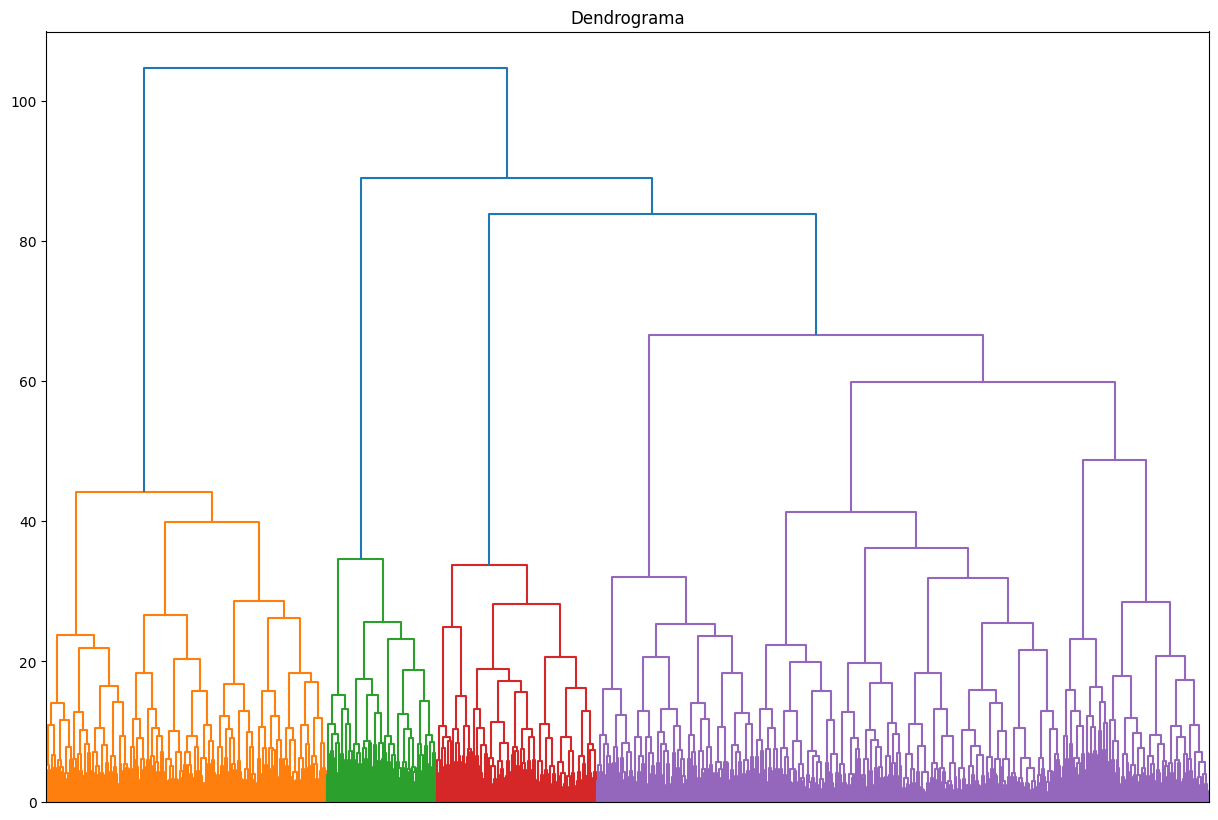

In [16]:
# Cálculo de linkage
linked = linkage(x_sc, method = 'ward')

# Trazado del dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Dendrograma')
plt.xticks([])
plt.show()

En el grafico se puede observar que se generan 5 clusters 

**Clúster**

In [17]:
# Entrenamiento de K-means con n=5
km = KMeans(n_clusters=5)
labels = km.fit_predict(x_sc)

# Etiquetas de clúster en el campo de nuestro conjunto de datos
data['cluster_km'] = labels

# Análisis de valores medios por clúster
cluster_means = data.groupby(['cluster_km']).mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.496063,0.000000,0.460630,0.078740,1.0,2.375984,0.218504,28.486220,135.544499,2.222441,2.811024,1.666510,1.485248,0.440945
1,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
2,0.552969,0.979045,0.352736,0.233993,1.0,2.571595,0.470314,30.098952,162.548581,2.371362,5.006985,2.802940,2.798145,0.071013
3,0.489051,1.000000,0.351987,0.237632,1.0,1.966748,0.340633,28.144363,130.234172,1.875912,2.317924,1.234082,0.995237,0.523114
4,0.501972,0.960552,0.783037,0.573964,1.0,10.887574,0.541420,29.980276,160.794855,9.948718,4.724852,1.996468,1.989661,0.027613


In [18]:
# Cálculo de tasa de cancelación por clúster
cluster_churn_rate = data.groupby('cluster_km')['Churn'].mean()
print(cluster_churn_rate) 

cluster_km
0    0.440945
1    0.266839
2    0.071013
3    0.523114
4    0.027613
Name: Churn, dtype: float64


La tasa de cancelación por clúster nos dice que el Clúster 1 es el grupo que tiene una alta tasa de cancelación con un 51%, la frecuencia de visitas es muy baja y su lifetime es muy corto. Por otro lado el Clúster 4 es el grupo más estable ya que su tasa de cancelación es de 2.6% que en comparación con el Clúster 1 se puede observar una notable diferencia, por lo que se necesita prestar más atención a lo que sucede con el clúster 1.

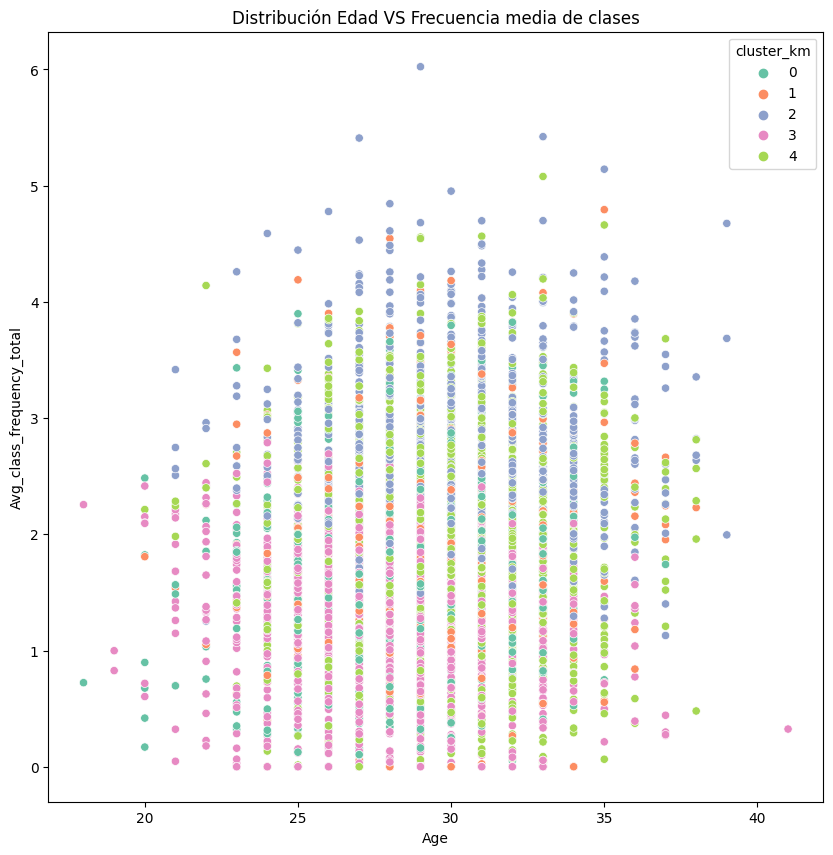

In [19]:
# Grafico de distribución Edad
plt.figure(figsize = (10,10))
sns.scatterplot(data=data, x='Age',y='Avg_class_frequency_total', hue = 'cluster_km', palette = 'Set2')
plt.title('Distribución Edad VS Frecuencia media de clases')
plt.show()

Al observar el grafico notamos que los clientes más comprometidos se encuentran en diferentes edades, esto se puede deber a que el compromiso de los clientes no depende únicamente de la edad, sino de otros factores, como el tipo de contrato, la motivación personal o los servicios adicionales que utiliza.Podemos decir que los clientes jóvenes de 20-30 años, son más propensos a asistir menos al gimnasio. Podrías enfocarte en estrategias específicas para aumentar la frecuencia de este grupo,en cambio los clientes de mayor edad de 30-40 muestran mayor variedad en sus patrones de uso.

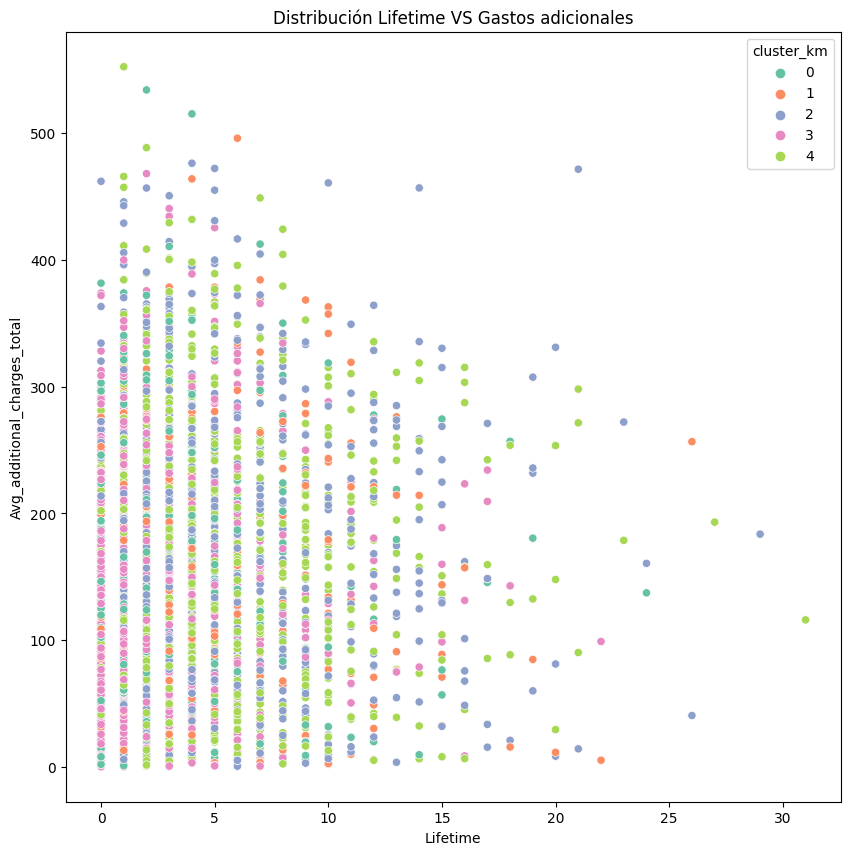

In [20]:
# Grafico de distribución tiempo de vida
plt.figure(figsize = (10,10))
sns.scatterplot(data=data, x='Lifetime',y='Avg_additional_charges_total', hue = 'cluster_km', palette = 'Set2')
plt.title('Distribución Lifetime VS Gastos adicionales')
plt.show()

En el grafico podemos observar que la tendencia muestra que el tiempo de vida de los clientes se concentra de 0 a 10 meses, el clúster que menos dinero gasta en promedio es el clúster 1, puede deberse a que su tiempo de vida en el gimnasio es de 0 a 5 meses, los clústeres 0 y 2 aunque son pocos son los que más tiene tiempo de vida llegando a superar poco más de 30 meses, el clúster que más dinero gasta en otros servicios es el clúster 4.

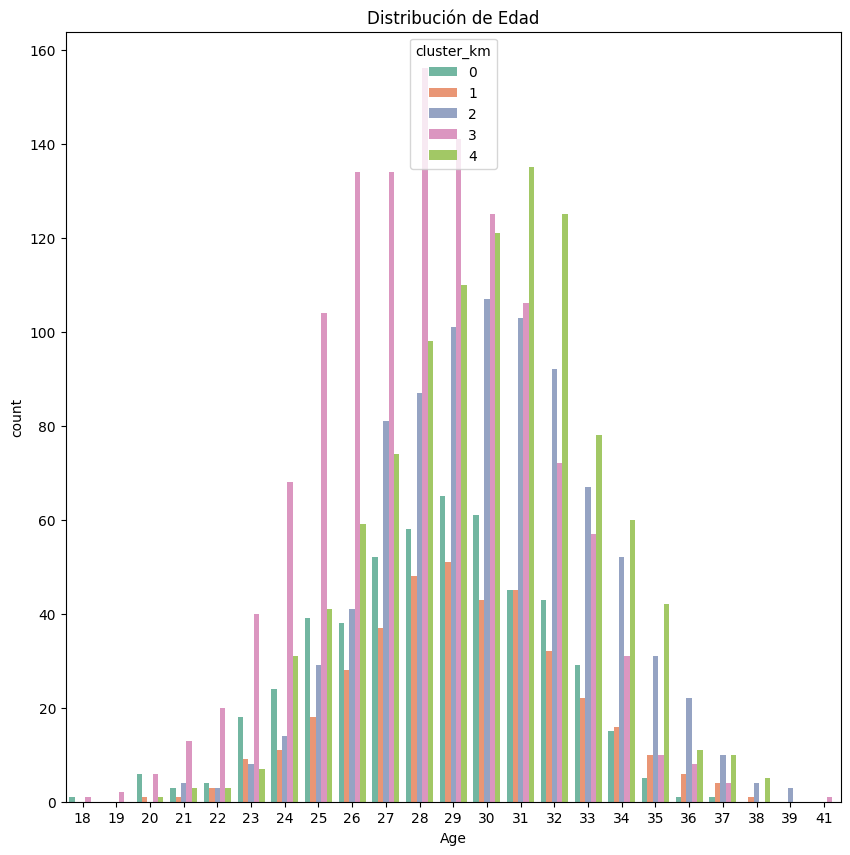

In [31]:
# Grafico de edad y clúster
plt.figure(figsize = (10,10))
sns.countplot(data=data, x='Age', hue= 'cluster_km', palette = 'Set2')
plt.title('Distribución de Edad')
plt.show()

En el grafico podemos observar los 5 clústeres abarcan casi todas las edades, el clúster con más clientes es el 3, las edades más comunes de este clúster son de 26 a 30 años, el clúster con menos clientes es el 1, para el clúster 4 que es uno de los más estables podemos ver que el rango de edad que más común es de 28 a 32 años.

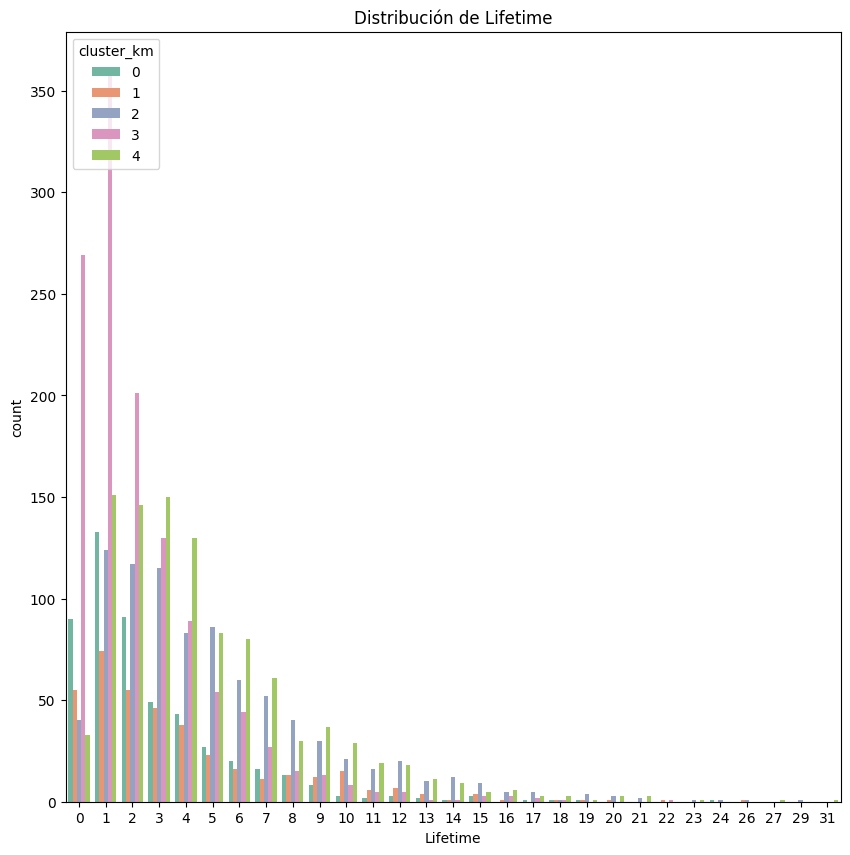

In [32]:
# Grafico de Lifetime y clúster
plt.figure(figsize = (10,10))
sns.countplot(data=data, x='Lifetime', hue= 'cluster_km', palette = 'Set2')
plt.title('Distribución de Lifetime')
plt.show()

Para el clúster 0 el tiempo de vida está entre los 0 y 2 meses, el clúster 1 el tiempo de vida es de 0 a 4 meses, también en menor medida puede llegar hasta 12 meses, el clúster 2 se puede observar que el tiempo de vida es de 1 a 5 meses, pudiendo en menos medida llegar hasta los 29 meses, el clúster 3 al ser el grupo más grande se puede observar que el tiempo de vida es de 0 a 3 meses con una cantidad considerable en 0 meses, en menor medida pueden llegar hasta los 17 meses, para el clúster 4 se puede observar que el tiempo de vida es de 1 a 4 meses, en menos medida pueden llegar a los 31 meses. 

## Conclusión 
<a id="Conclusión"></a>

Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.





Después de realizar el análisis para la cadena de gimnasios Model Fitness podemos concluir con las siguientes recomendaciones:

- El modelo que se puede implementar es el de Bosque aleatorio, para predecir qué clientes tienen más probabilidades de realizar alguna cancelación el próximo mes, así poder tomar medidas preventivas y evitar la cancelación de los clientes.
- Los clústeres a los que se debe prestar especial atención debido a que tienen una alta tasa de cancelación son los 1 y 4, el clúster 1 es el que tiene la mayor tasa de cancelación con un 51% de clientes cancelando, se observó que el tiempo de vida de este grupo es corta y también tiene una frecuencia de visitas baja.
- Aunque los clústeres 4 y 2 son que tienen una baja tasa de cancelación, esto no significa que se deban abandonar y al igual que los demás clústeres debe estar en constante observación.
- Podemos decir que existe un grupo de clientes de entre 20 y 40 años de edad que realizan en promedio 4 visitas a la semana, que es el grupo más estable y también que tiene un gasto considerable en otros servicios que ofrece el gimnasio.
- El análisis muestran que los clientes con un tiempo de vida menor y una baja frecuencia de visitas son los más propensos a cancelar. También, los contratos más cortos se relacionan con la pérdida de clientes. Por estas razones las estrategias de retención deben centrarse en aumentar la frecuencia de visitas de los nuevos usuarios y fomentar contratos más largos.
- Algunas recomendaciones para la retención de clientes son:
    - Programas de seguimiento personalizado: implementar un programa de seguimiento para los clientes nuevos o con baja frecuencia de visitas.
    - Incentivos para compromisos a largo plazo: descuentos o beneficios adicionales a los clientes que renueven por períodos más largos como 6 meses o 1 año.
    - Intervenciones preventivas: usar el modelo para detectar a tiempo a los clientes en riesgo de cancelar.
- En el análisis se pudo observar que la edad por sí sola no es un buen predictor de la retención, pero sí hay diferencias en la frecuencia de visitas según la edad y el clúster. Entonces se podría enfocar las estrategias en aumentar la frecuencia de los grupos menos comprometidos podría ayudar a mejorar la retención.